In [64]:
%run functions.py

import numpy as np
import pandas as pd
from scipy.io import loadmat

from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Task 3 - Regression 

## Load settings

In [65]:
pd.set_option('display.max_colwidth',-1)

k=10 # Define k for crossvalidation
seed = 42 # Seed to use
feature_tot = 0 # Total selected features -> Start at 0 before PCA

scoring='neg_mean_squared_error' # Scoring method for GridsearchCV
score_function = f_regression # Score function for Feature selection


np.random.seed(seed) # Define the random seed

In [66]:
# GridSearchCV
estimators = [
    ('clf', SVR()),
]
param_grid = [
    {
        'clf':[SVR()],
        'clf__C':[0.1,10,100],
    },{
        'clf':[Lasso(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],

    },{
        'clf':[ElasticNet(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],
        'clf__max_iter':[100,5000,10000],
}]

## Load dataset

In [67]:
filename = "datasets/powerTrainData.mat"

mat = loadmat(filename)
input_train = mat['powerTrainInput'].T

target_train = mat['powerTrainOutput'].reshape(len(input_train))
input_test = mat['powerTestInput'].T

## Data info

In [68]:
get_data_info(input_train, target_train)

Length of 844
X.shape: (844, 15) y.shape: (844,)
Contains Nan: False False
Contains +inf: False False
Contains -inf: False False


## Preprocess
Normalize the dataset

In [69]:
input_train, input_test, target_train, input_train_copy, input_train_copy_normalized = preprocessing(input_train,target_train, input_test)

844


## Feature reduction
Reduce dimensionality by PCA transform

In [70]:
feature_tot, pca, pca_input = feature_reduction(input_train, target_train,input_train_copy)

original shape:    (844, 15)
transformed shape: (844, 6)
Explained variance: [0.71291343 0.08305948 0.06661705 0.04012179 0.03533515 0.02463563]


# Plot PCA

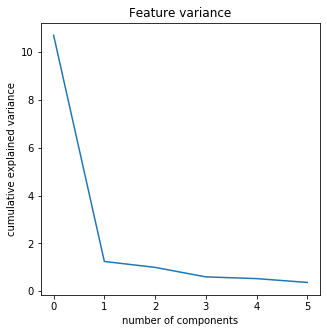

In [71]:
plot_feature_variance(pca_input)

## Plot top 10 histogram over reduced features

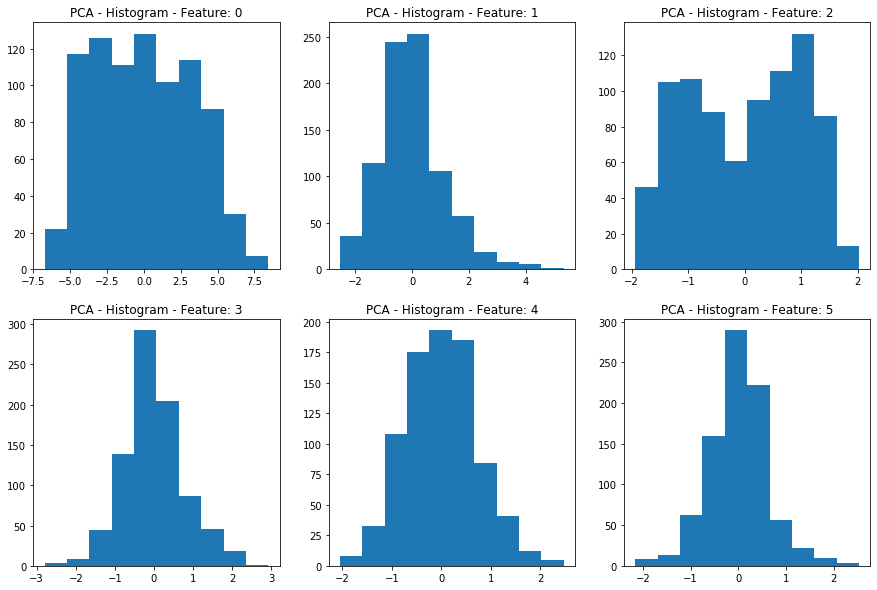

In [72]:
plot_top_features(feature_tot,pca_input)

# Feature selection
Extract top features above depending on PCA

(844, 15)


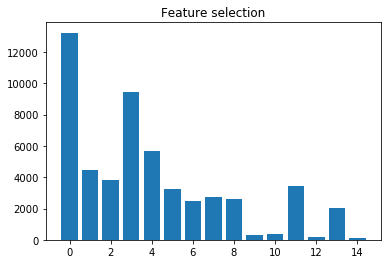

In [73]:
input_train_fs, input_test_fs = feature_selection(score_function, input_train, target_train, input_test, feature_tot=feature_tot)

## Hyperparameter tuning

In [74]:
# GridSearchCV
grid = parameter_tuning(estimators, param_grid, scoring, input_train_fs, target_train, k)


Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    3.1s finished


## Get Model info

In [75]:
get_model_info(grid)

Best score: -12067.91740910722
Best params {'clf': Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False), 'clf__alpha': 0.1}

-266785.297 (+/-60315.364)

-33970.753 (+/-26716.712)

-16481.157 (+/-12239.791)

-12067.917 (+/-5835.359)

-12113.132 (+/-5766.302)

-12113.801 (+/-5705.400)

-12132.051 (+/-5528.305)

-12878.594 (+/-5903.256)

-12878.767 (+/-5903.089)

-12878.767 (+/-5903.089)

-16778.402 (+/-5025.191)

-16778.402 (+/-5025.191)

-16778.402 (+/-5025.191)

-22025.638 (+/-4182.038)

-22025.638 (+/-4182.038)

-22025.638 (+/-4182.038)

-42634.064 (+/-6951.389)

-42634.064 (+/-6951.389)

-42634.064 (+/-6951.389)



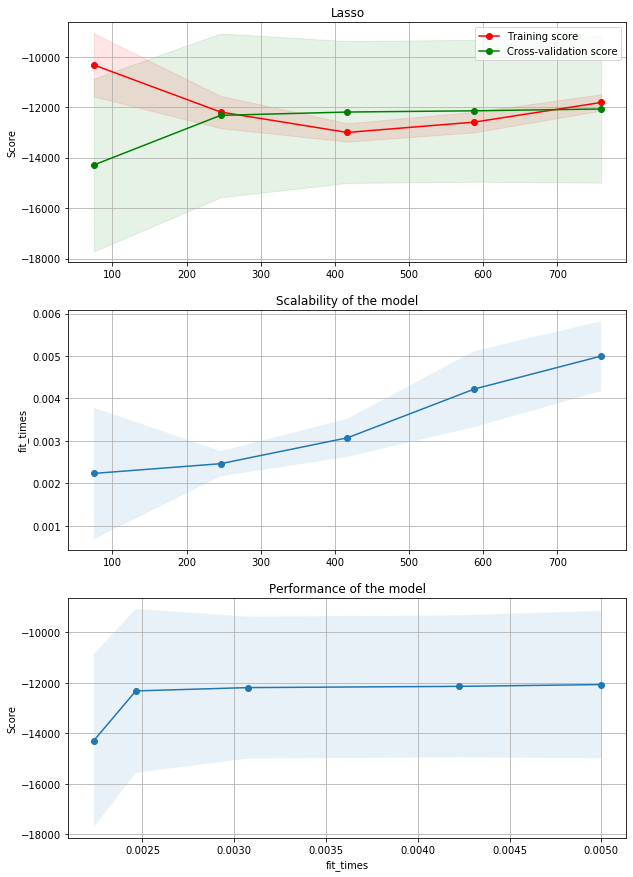

In [76]:
validate_curve(grid, input_train_fs, target_train,scoring=scoring, k=k)

# Predict testset

In [77]:
model = predict_model(grid, input_train_fs, target_train, input_test_fs)

[3298.14091687 3135.73105674 3314.88582484 3125.94097085 2890.19858083
 2539.07793126 2393.91820195 3390.68837127 3112.84549314 3421.20361837
 3260.40686878 3423.21731116 3011.39447961 2875.41539955 2405.66497129
 3222.88358512 3281.44293532 3204.04698046 2716.20311187 3266.60727439
 2947.08229247 3100.081042   3229.14772742 3285.86406334 2975.8049378
 3123.2315757  3558.41798155 2331.10080584 3205.02795656 3310.92441077
 3691.77629617 2975.26413041 3106.58298139 3923.12670976 3460.50162544
 3244.4559423  3371.51489528 2855.78808113 3177.11360882 2912.59580398
 2680.60785569 3500.66354894 3075.82589171 3408.71389758 3621.5739901
 3086.6242768  2527.76777762 2822.67983159 2892.2114502  2326.93101214
 3164.28485081 3453.32078531 3098.42097959 2502.37718802 2997.43905325
 3193.55238938 2631.81133056 3273.403529   3444.02145464 3194.91160463
 3197.07682706 3722.83741679 2921.83746271 3101.79381903 3693.03379288
 3464.95260346 3222.76966602 3145.57328422 2974.20679114 3317.72401092
 2498.79